In [1]:
#Set seed
import numpy as np
np.random.seed(31415)

In [2]:
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import IncrementalPCA as IPCA

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns
import pandas as pd

import torch

In [3]:
path_embd_test = '/cas/DeepLearn/elperu/tmp/speech_datasets/LibriSpeech/tot_embeddings/test_samples.csv'
path_embd_enroll =  '/cas/DeepLearn/elperu/tmp/speech_datasets/LibriSpeech/tot_embeddings/enroll_samples.csv'

In [4]:
def load_test(path):
    X = []
    df = pd.read_csv(path)
    labels = []
    for idx, row in df.iterrows():
        path = row['_path']
        spk = row['spk_id']
        th_embd = torch.load(path)
        X.append(th_embd.numpy())
        labels.append(spk)
    return np.concatenate(X), labels

In [5]:
x, y_true = load_test(path_embd_test)

In [6]:
n_classes = len(np.unique(y_true))

In [7]:
n_classes

50

### TSNE

In [8]:
def compute_plot_tsne(data, plot=True):
    tsne_out = TSNE(n_components=2, random_state=10, init='pca', verbose=0).fit_transform(data)
    
    if plot:
        plt.figure(figsize=(10,10))
        plt.scatter(tsne_out[:, 0], tsne_out[:, 1])
        plt.plot()
        plt.show()
        plt.close()
    
    return tsne_out

In [9]:

def compute_plot_pca(data, plot=True):
    ipca_out = IPCA(n_components=2).fit_transform(data)
    
    if plot:
        plt.figure(figsize=(10,10))
        plt.scatter(ipca_out[:, 0], ipca_out[:, 1])
        plt.plot()
        plt.show()
        plt.close()
    
    return ipca_out

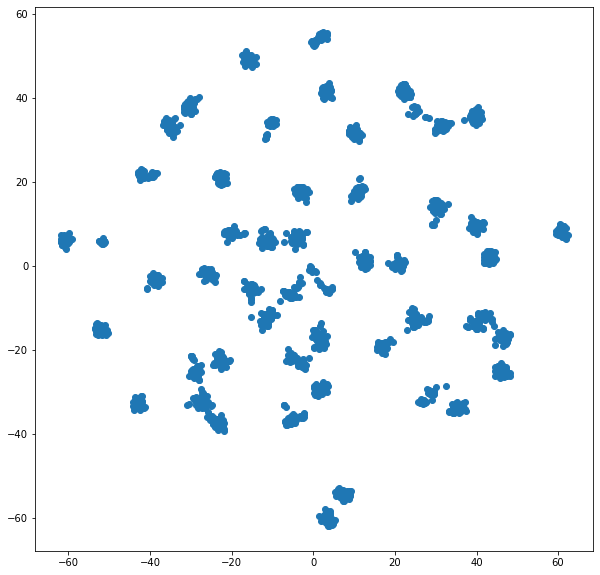

In [10]:
tsne_out = compute_plot_tsne(x)

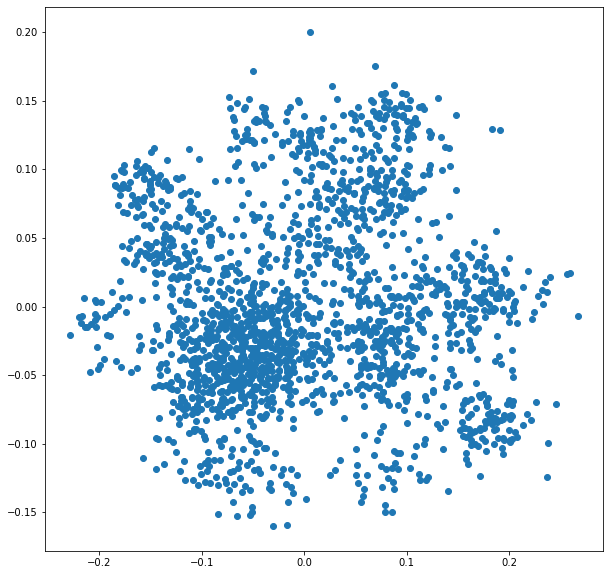

In [11]:
pca_out = compute_plot_pca(x)

### Clustering

In [25]:
def plot_cluster(data, labels):
    
    df_data = pd.DataFrame(data, columns=['dim_1', 'dim_2'])
    
    
    #f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
    fig = plt.figure(figsize=(10, 10))
    
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")
    sns.scatterplot(
        x='dim_1',
        y='dim_2',
        hue=labels,
        palette=sns.color_palette("hls", len(np.unique(labels))),
        data=df_data,
        legend="brief",
        s=200,
        alpha=1.0
    )
    
    #plt.show()
    #plt.close()

In [30]:
agglomerative_pred = AgglomerativeClustering(n_clusters=n_classes, affinity = "cosine", linkage = "complete").fit_predict(x)

In [31]:
# KMeans
kmeans_pred = KMeans(n_clusters=n_classes).fit_predict(x)

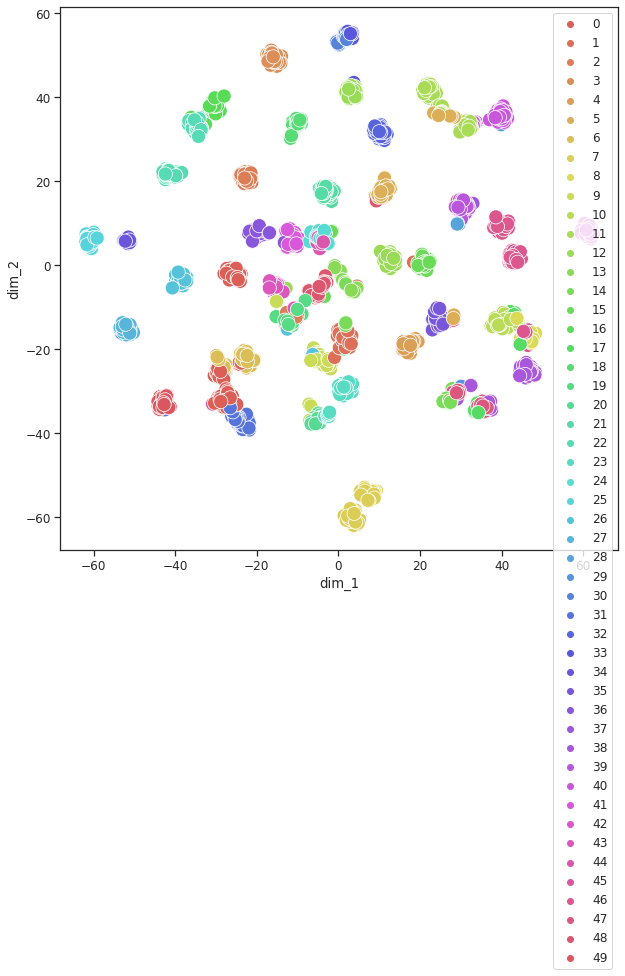

In [32]:
# Plot
plot_cluster(tsne_out, agglomerative_pred)

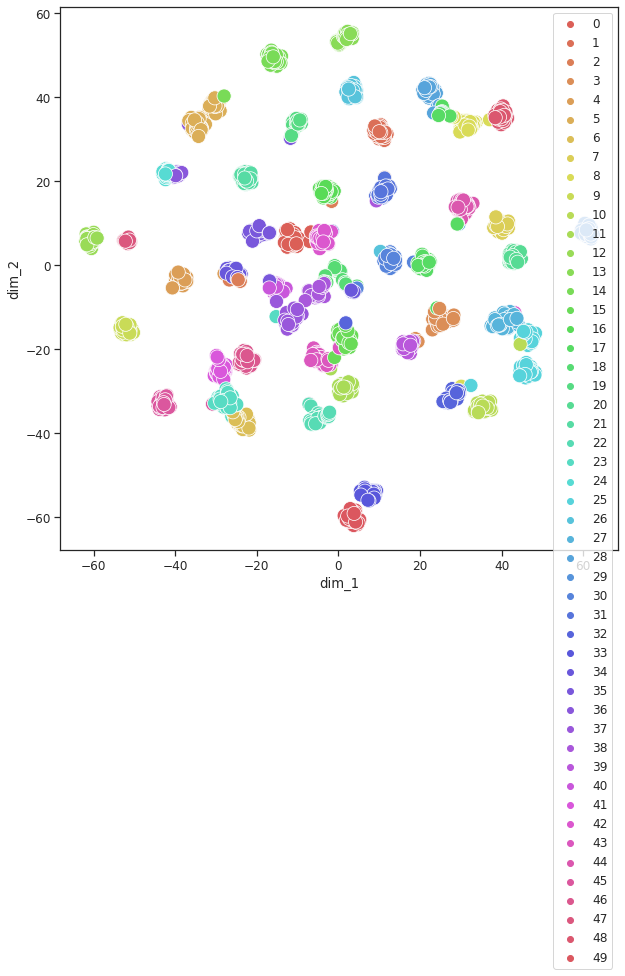

In [33]:
plot_cluster(tsne_out, kmeans_pred)

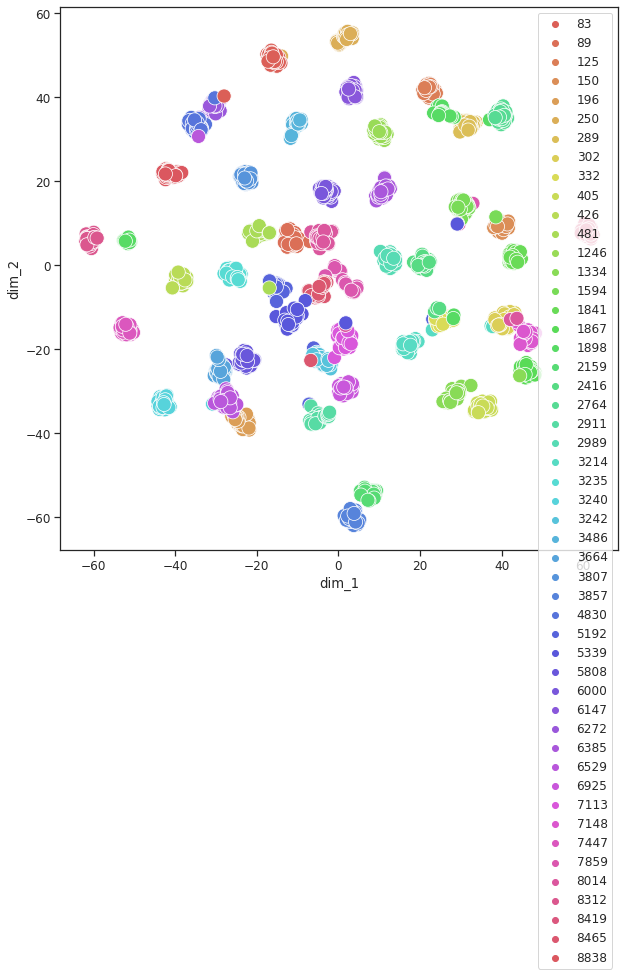

In [42]:
plot_cluster(tsne_out, y_true)

### Metrics

In [34]:
from sklearn import metrics

def compute_matrics(y_pred):
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, y_pred))
    print("Completeness: %0.3f" % metrics.completeness_score(y_true, y_pred))
    print("V-measure: %0.3f" % metrics.v_measure_score(y_true, y_pred))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_true, y_pred))

In [39]:
print('== Agglomerative clustering ==\n')
compute_matrics(agglomerative_pred)


== Agglomerative clustering ==

Homogeneity: 0.879
Completeness: 0.919
V-measure: 0.899
Adjusted Rand-Index: 0.709


In [40]:
print('== KMeans ==\n')
compute_matrics(kmeans_pred)

== KMeans ==

Homogeneity: 0.939
Completeness: 0.949
V-measure: 0.944
Adjusted Rand-Index: 0.864
